In [1]:
cd H:\Mumbai_case\Mumbai_1km_GEE

H:\Mumbai_case\Mumbai_1km_GEE


In [1]:
import xarray as xr
import rioxarray as rx
from rasterio.merge import merge
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.font_manager as font_manager

In [3]:
d1 = xr.open_dataset(r"MODIS_1KM_AOD_07May2024 (1).tif")
d2 = xr.open_dataset(r"MODIS_1KM_AOD_08May2024.tif")
d3 = xr.open_dataset(r"MODIS_1KM_AOD_09May2024.tif")
d4 = xr.open_dataset(r"MODIS_1KM_AOD_10May2024.tif")
d5 = xr.open_dataset(r"MODIS_1KM_AOD_11May2024.tif")
d6 = xr.open_dataset(r"MODIS_1KM_AOD_12May2024.tif")
d7 = xr.open_dataset(r"MODIS_1KM_AOD_13May2024.tif")
d8 = xr.open_dataset(r"MODIS_1KM_AOD_14May2024.tif")
d9 = xr.open_dataset(r"MODIS_1KM_AOD_15May2024.tif")
d10 = xr.open_dataset(r"MODIS_1KM_AOD_16May2024.tif")
d11 = xr.open_dataset(r"MODIS_1KM_AOD_17May2024.tif")
d12 = xr.open_dataset(r"MODIS_1KM_AOD_18May2024.tif")
d13 = xr.open_dataset(r"MODIS_1KM_AOD_19May2024.tif")


In [4]:
data01 = xr.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13],dim='band')
data01

<xarray.Dataset>
Dimensions:      (band: 13, x: 5069, y: 4197)
Coordinates:
  * band         (band) int32 1 1 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 56.17 56.18 56.19 56.19 ... 101.7 101.7 101.7 101.7
  * y            (y) float64 39.1 39.09 39.08 39.07 ... 1.433 1.424 1.415 1.406
    spatial_ref  int32 0
Data variables:
    band_data    (band, y, x) float64 nan nan nan nan nan ... nan nan nan 0.364

In [5]:
days = ['07 May 2024','08 May 2024','09 May 2024','10 May 2024','11 May 2024','12 May 2024','13 May 2024','14 May 2024',
        '15 May 2024','16 May 2024','17 May 2024','18 May 2024','19 May 2024']
days

['07 May 2024',
 '08 May 2024',
 '09 May 2024',
 '10 May 2024',
 '11 May 2024',
 '12 May 2024',
 '13 May 2024',
 '14 May 2024',
 '15 May 2024',
 '16 May 2024',
 '17 May 2024',
 '18 May 2024',
 '19 May 2024']

In [6]:
era1 = xr.load_dataset('adaptor.mars.internal-1718948064.2702932-3205-14-a2f66788-ac0e-41d2-ac76-cecf2e9604e3.nc')
era = era1.resample(time='D').mean()
era

<xarray.Dataset>
Dimensions:    (longitude: 183, latitude: 151, time: 13)
Coordinates:
  * longitude  (longitude) float32 56.17 56.42 56.67 56.92 ... 101.2 101.4 101.7
  * latitude   (latitude) float32 38.9 38.65 38.4 38.15 ... 2.15 1.9 1.65 1.4
  * time       (time) datetime64[ns] 2024-05-07 2024-05-08 ... 2024-05-19
Data variables:
    u100       (time, latitude, longitude) float32 4.94 4.578 ... -1.476 -1.614
    v100       (time, latitude, longitude) float32 3.935 2.704 ... 2.497 2.714
    u10        (time, latitude, longitude) float32 3.451 3.193 ... -0.8056
    v10        (time, latitude, longitude) float32 2.655 1.699 ... 1.238 1.548
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-21 05:34:26 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

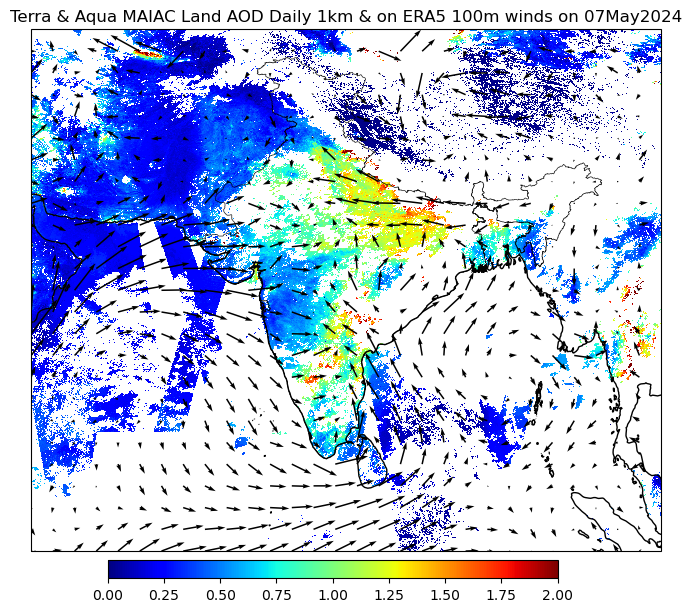

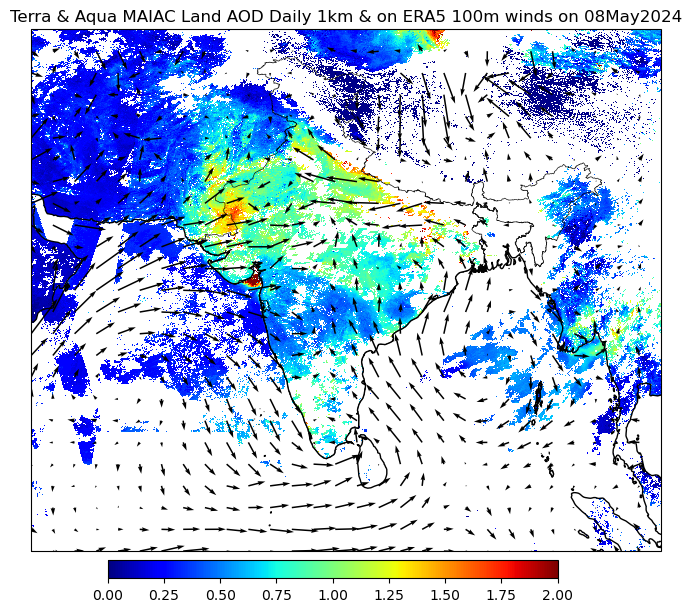

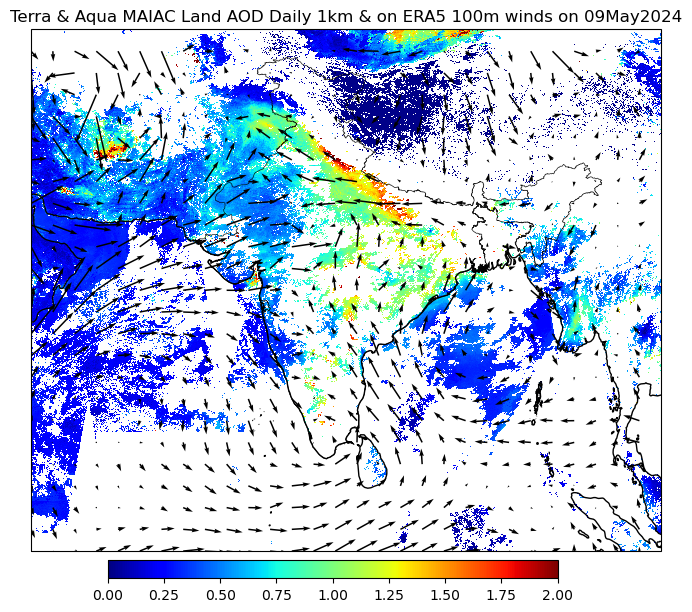

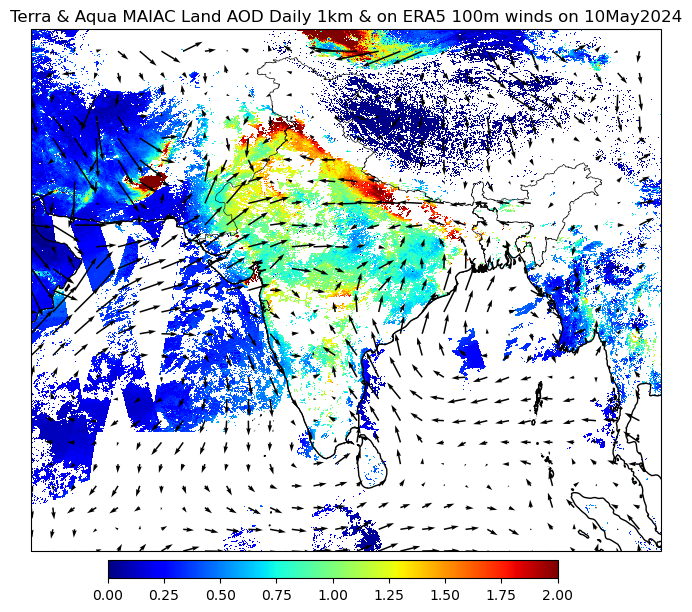

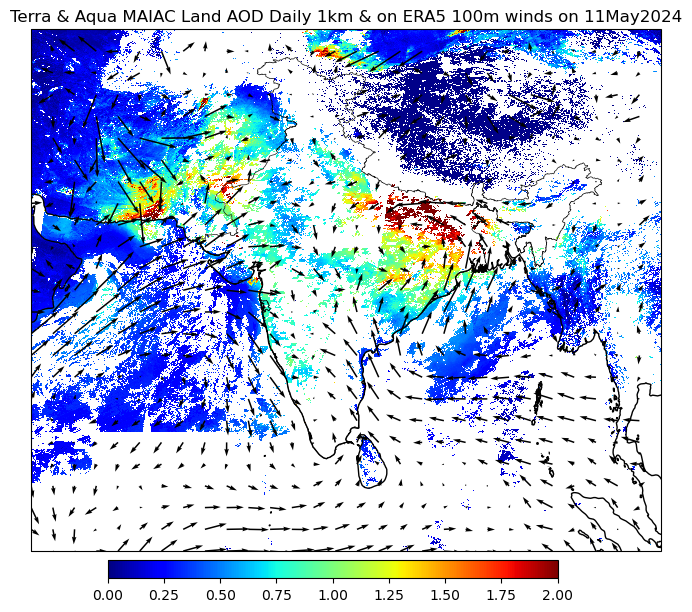

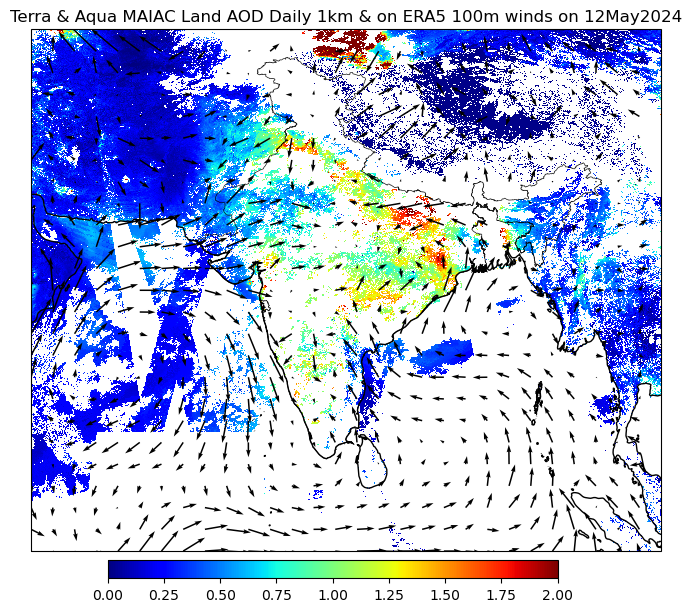

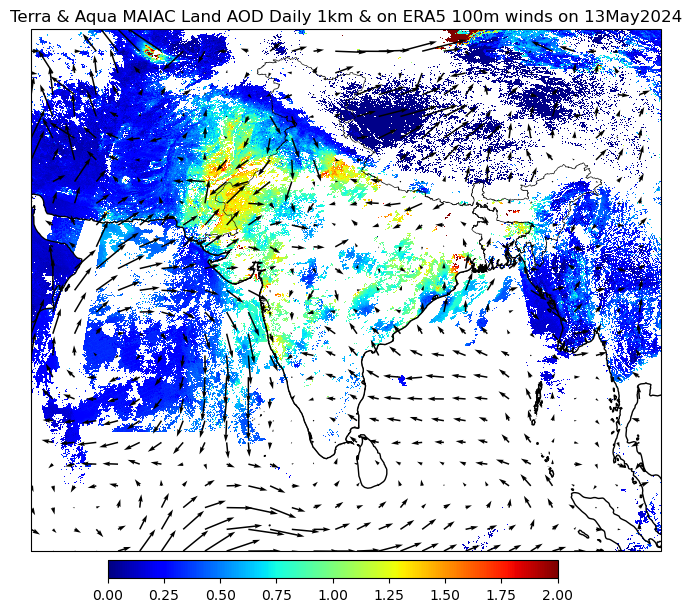

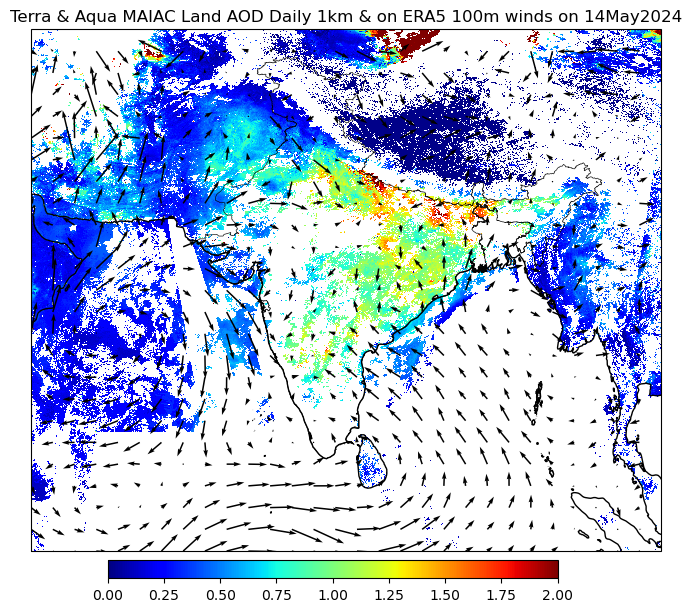

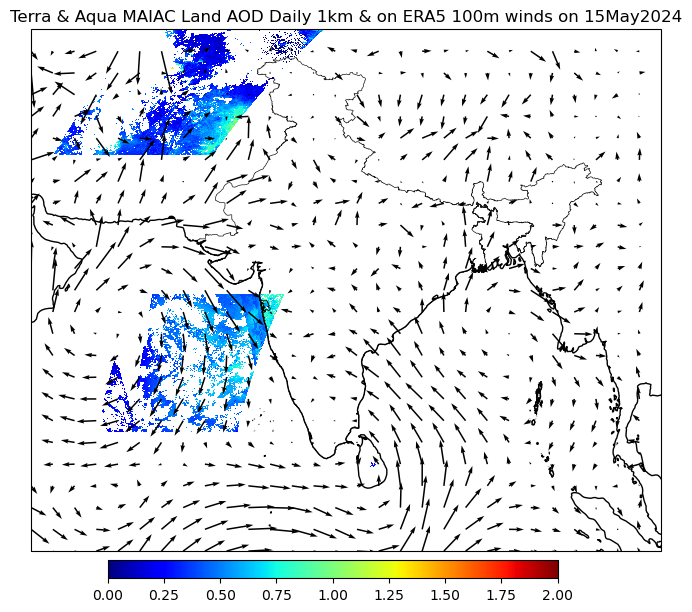

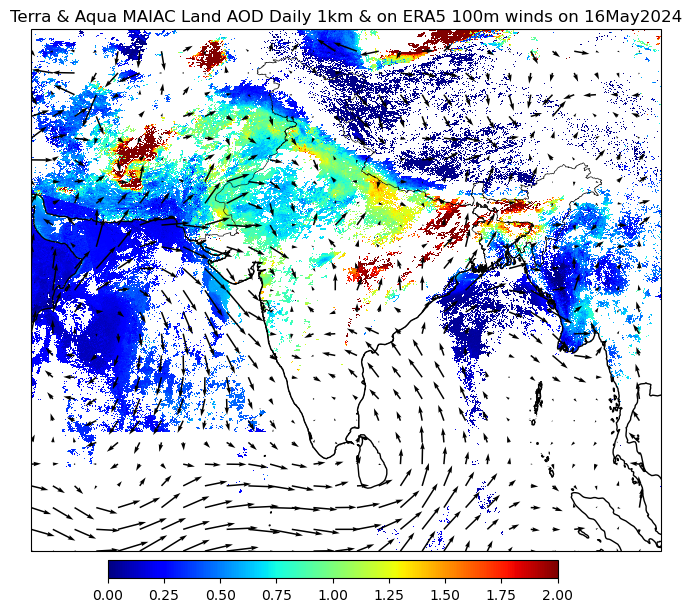

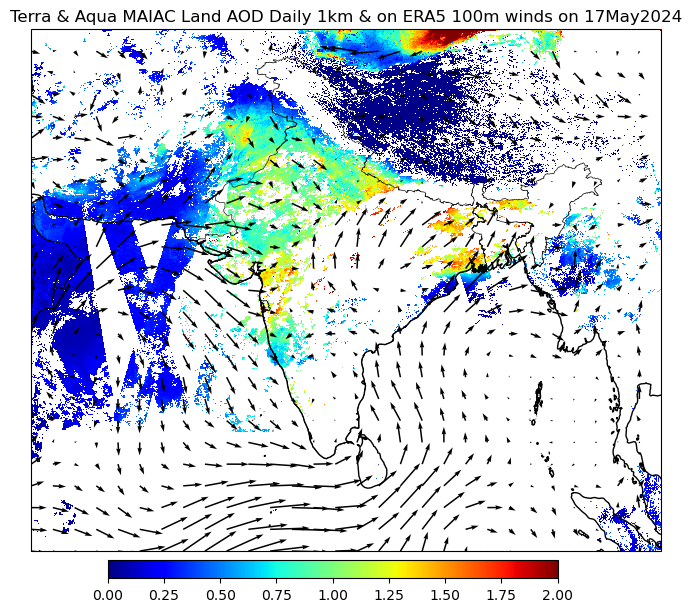

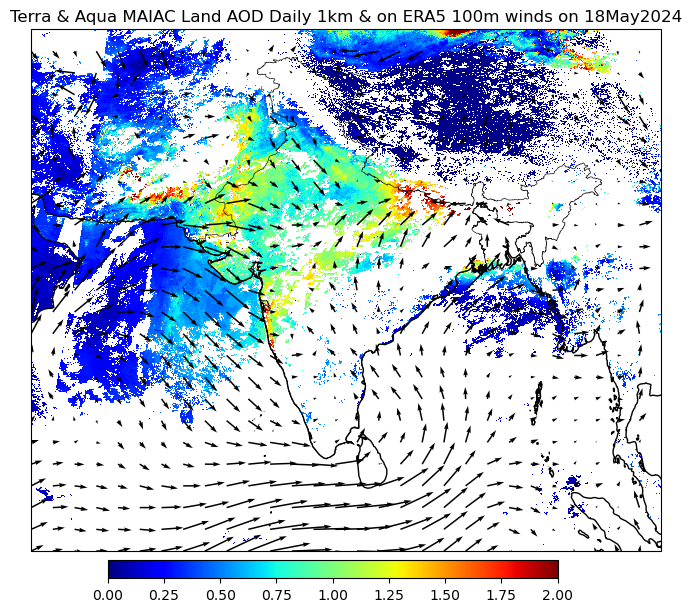

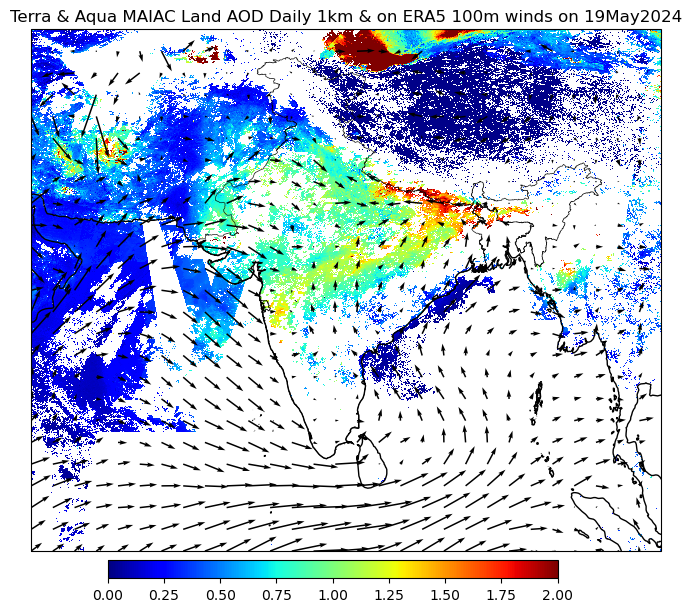

In [8]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())
fname3 = r"H:\Mumbai_case\Mumbai_1km_GEE\MMRDA_ShapeFile\MMRDA_Manual.shp"
adm1_shapes3 = list(shpreader.Reader(fname3).geometries())




for i in np.arange(0,13):
    fig=plt.figure(figsize=(9,18))#,constrained_layout=True)
    ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)
    def main():
        ax1 = plt.subplot(1,1, 1, projection=ccrs.PlateCarree())   
        ax1.set_extent([56.17,101.7,1.405863,39.1], ccrs.PlateCarree())    
        ax1.set_title(f'Terra & Aqua MAIAC Land AOD Daily 1km & on ERA5 100m winds on {days[i][0:2]+days[i][3:6]+days[i][7:]}')
#         filled_c = ax1.contourf(data01.x, data01.y, data01.band_data[i,:,:],  
#                             60, transform=ccrs.PlateCarree(),vmin=0, vmax=1,cmap='jet')
        filled_c = ax1.pcolormesh(data01.x, data01.y, data01.band_data[i,:,:],  
                            transform=ccrs.PlateCarree(),vmin=0, vmax=2,cmap='jet')
        ax1.quiver(era.longitude,era.latitude,np.array(era.u100[i,:,:]),np.array(era.v100[i,:,:]),regrid_shape=25)#
#                 scale=100,scale_units='xy')
        ax1.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
        ax1.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
        ax1.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
#     ax1.text(0.27, 0.1, '20/10/2022', horizontalalignment='center', verticalalignment='center',
#              fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
#         ax1.plot( 73.6477,17.9307, marker = '*',markersize = 10)



    # Create the axis for the colorbars
        ax2 = fig.add_axes([0.185,   #= >away from x axis
                         0.34,   #= position up and down
                         0.5,   #= width of cbar
                         0.01])  # vertical vidth
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
        cmap = mpl.cm.jet
        norm = mpl.colors.Normalize(vmin=0, vmax=2)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
        fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax2, orientation='horizontal')#, label='Some Units'
    
    
    
#         plt.title(f'Terra & Aqua MAIAC Land Aerosol Optical Depth Daily 1km on {days[i][0:2]+days[i][3:6]+days[i][7:]}')
    if __name__ == '__main__':
        main()
    plt.savefig(f'MODIS_combined_aod_{days[i][0:2]+days[i][3:6]+days[i][7:]}_100winds.jpg',bbox_inches='tight',dpi=720)

In [59]:
from shapely.geometry import mapping
import geopandas as gpd

MSWEP_monthly2 = data01
MSWEP_monthly2.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
MSWEP_monthly2.rio.write_crs("epsg:4326", inplace=True)
Africa_Shape = gpd.read_file(r'H:\Mumbai_case\Mumbai_1km_GEE\MMRDA_ShapeFile\MMRDA_Manual.shp', crs="epsg:4326")

data102 = MSWEP_monthly2.rio.clip(Africa_Shape.geometry.apply(mapping), Africa_Shape.crs, drop=True)

data102

<xarray.Dataset>
Dimensions:      (band: 13, x: 83, y: 100)
Coordinates:
  * band         (band) int32 1 1 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 72.72 72.73 72.74 72.75 ... 73.43 73.44 73.45 73.46
  * y            (y) float64 19.52 19.52 19.51 19.5 ... 18.66 18.65 18.64 18.64
    spatial_ref  int32 0
Data variables:
    band_data    (band, y, x) float64 nan nan nan nan nan ... nan nan nan nan

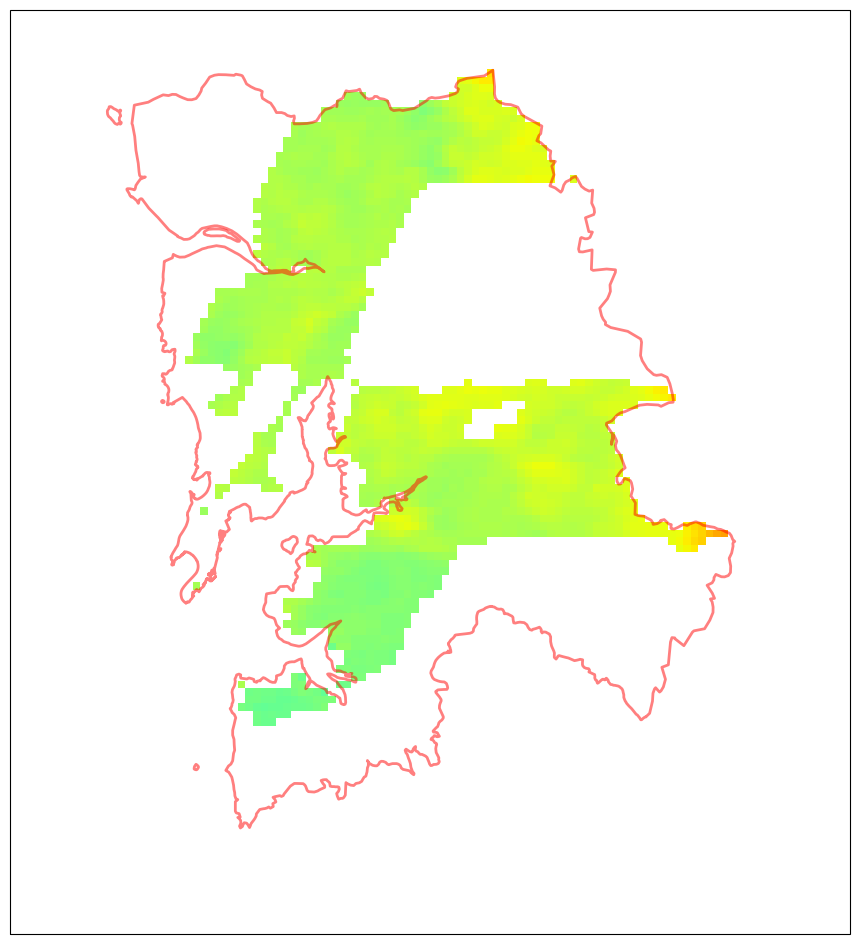

In [72]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())
fname3 = r"H:\Mumbai_case\Mumbai_1km_GEE\MMRDA_ShapeFile\MMRDA_Manual.shp"
adm1_shapes3 = list(shpreader.Reader(fname3).geometries())

i = 12


lonmin = 72.6    # 56.17    #     19.374147, 72.549006
lonmax = 73.6   #101.7    #
latmin = 18.5   #1.405863 #   18.833024, 72.577845
latmax = 19.6  #39.1     #

def main():
    plt.figure(figsize=(15,12),facecolor = 'white')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]
#     ax.coastlines()
#     ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
#     ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
#                   edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
    ax.add_geometries(adm1_shapes3, ccrs.PlateCarree(),
                  edgecolor='red', alpha=0.5,lw = 2, facecolor='none') #
    
#     ax.add_feature(cfeature.COASTLINE)
#     ax.gridlines()
    ax.set_facecolor('white')
    ax.set_title(f'Terra & Aqua MAIAC Land Aerosol Optical Depth Daily 1km on {days[i]}' ,
                  fontweight="bold", size=20,family= 'Arial')
    filled_c = ax.pcolormesh(data102.x, data102.y, data102.band_data[i,:,:],  
                            transform=ccrs.PlateCarree(),vmin=0, vmax=2,cmap='jet')
    
#     ax.plot(lon23102022,lat23102022,markersize=10,marker='^',color='yellow',lw=4,label='23102022')
#     ax.plot(lon24102022,lat24102022,markersize=10,marker='^',color='lime',lw=4,label='24102022')
#     plt.text(76.0420,18.4,'Osmanabad Airport',horizontalalignment='right', color= 'red',fontweight="bold", size=20,family= 'Arial')
#     ax.legend()
    gl = ax.gridlines(draw_labels=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,5))
    gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,5))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
    gl.ylabel_style = {'size': 12,'color': 'red', 'weight': 'bold'}
        # Add a colorbar for the filled contour.
#     a = plt.colorbar(filled_c,ax=ax, orientation='vertical',pad=0.05,shrink=0.75)
#     a.set_label(label=f'AOD',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})

if __name__ == '__main__':
    main()
plt.savefig(f'MODIS_Combined_Mumbai_{days[i][0:2]+days[i][3:6]+days[i][7:]}.jpg',bbox_inches='tight',dpi=720)
plt.show()

## CPCB Data 

In [142]:
data = pd.read_excel(r'H:\Cyclone_Amphan\MERRA2_3D_Wind_Data\comparision20240620143237.xlsx',skiprows = 11,nrows=305)
data['From Date'] = pd.to_datetime(data['From Date'], format="%d-%m-%Y %H:%M")
data.columns

Index(['From Date', 'Bandra Kurla Complex  Mumbai - MPCB',
       'Borivali East  Mumbai - IITM', 'Borivali East  Mumbai - MPCB',
       'Byculla  Mumbai - BMC', 'Chakala-Andheri East  Mumbai - IITM',
       'Chembur  Mumbai - MPCB',
       'Chhatrapati Shivaji Intl. Airport (T2)  Mumbai - MPCB',
       'Colaba  Mumbai - MPCB', 'Deonar  Mumbai - IITM',
       'Ghatkopar  Mumbai - BMC', 'Kandivali East  Mumbai - MPCB',
       'Kandivali West  Mumbai - BMC', 'Kherwadi_Bandra East  Mumbai - MPCB',
       'Khindipada-Bhandup West  Mumbai - IITM', 'Kurla  Mumbai - MPCB',
       'Mindspace-Malad West  Mumbai - MPCB', 'Mulund West  Mumbai - MPCB',
       'Navy Nagar-Colaba  Mumbai - IITM', 'Powai  Mumbai - MPCB',
       'Sewri  Mumbai - BMC', 'Siddharth Nagar-Worli  Mumbai - IITM',
       'Sion  Mumbai - MPCB', 'Vasai West  Mumbai - MPCB',
       'Vile Parle West  Mumbai - MPCB', 'Worli  Mumbai - MPCB', 'Mean'],
      dtype='object')

(0.0, 300.0)

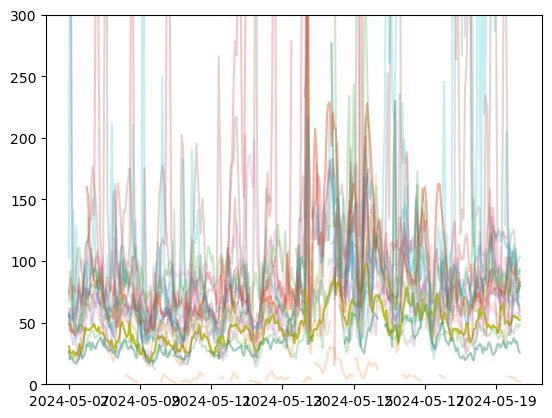

In [124]:
# plt.plot(data['From Date'],data['Bandra Kurla Complex  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Borivali East  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Borivali East  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Byculla  Mumbai - BMC'],alpha=0.25)
plt.plot(data['From Date'],data['Chakala-Andheri East  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Chembur  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Chhatrapati Shivaji Intl. Airport (T2)  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Deonar  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Colaba  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Ghatkopar  Mumbai - BMC'])
plt.plot(data['From Date'],data['Kandivali East  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
plt.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
plt.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Khindipada-Bhandup West  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Kurla  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Mindspace-Malad West  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Mulund West  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Navy Nagar-Colaba  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Powai  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Siddharth Nagar-Worli  Mumbai - IITM'],alpha=0.25)
plt.plot(data['From Date'],data['Sewri  Mumbai - BMC'],alpha=0.25)
plt.plot(data['From Date'],data['Worli  Mumbai - MPCB'],alpha=0.25)
plt.plot(data['From Date'],data['Vile Parle West  Mumbai - MPCB'],alpha=0.25)
plt.ylim(0,300)

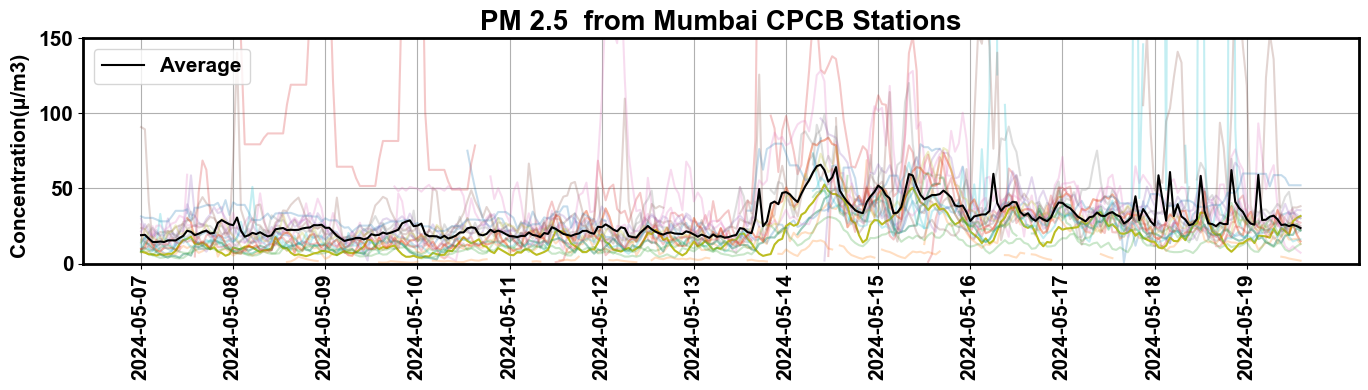

In [137]:
fig=plt.figure(figsize=(13.5,4))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)

font = font_manager.FontProperties(family='Arial',
                                   weight='bold',
                                   style='normal', size=15)
days=['2024-05-07','2024-05-08','2024-05-09','2024-05-10','2024-05-11','2024-05-12',
      '2024-05-13','2024-05-14','2024-05-15','2024-05-16','2024-05-17','2024-05-18',
      '2024-05-19']
con = [0,50,100,150]#,200,250,300,]#,200,250,300,350]
ax1 = plt.subplot()#1,3, 1)        

ax1.plot(data['From Date'],data['Borivali East  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Borivali East  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Byculla  Mumbai - BMC'],alpha=0.25)
ax1.plot(data['From Date'],data['Chakala-Andheri East  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Chembur  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Chhatrapati Shivaji Intl. Airport (T2)  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Deonar  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Colaba  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Ghatkopar  Mumbai - BMC'])
ax1.plot(data['From Date'],data['Kandivali East  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
ax1.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
ax1.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Khindipada-Bhandup West  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Kurla  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Mindspace-Malad West  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Mulund West  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Navy Nagar-Colaba  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Powai  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Siddharth Nagar-Worli  Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Sewri  Mumbai - BMC'],alpha=0.25)
ax1.plot(data['From Date'],data['Worli  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Vile Parle West  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Mean'],c='black',label = 'Average')


ax1.set_ylim(0,150)
# ax1.set_xlim(0,40)
ax1.grid()
ax1.set_title('PM 2.5  from Mumbai CPCB Stations',fontweight="bold", size=20,family= 'Arial')
ax1.set_xticks(days)
ax1.set_yticks(con)
plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
# ax1.legend(loc="upper left",prop=font, mode = "expand", ncol = 3)
# ax1.set_xticks(['2022-10-01','2022-10-10','2022-10-20','2022-10-24'])#,'2022-10-30'])
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
fig.text(-0.01, 0.6, 'Concentration(\u03BC/m3)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
# fig.text(0.45, -0.025, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
#         fontname='Arial')
plt.tight_layout()
plt.savefig('PM_2_5_CPCB_Mumbai_Stations.jpg',bbox_inches='tight',dpi=720)

## Navi Mumbai 

In [8]:
data = pd.read_excel(r"H:\Cyclone_Amphan\MERRA2_3D_Wind_Data\Navvi_Mumbai_10.xlsx",skiprows = 11,nrows=305)
data['From Date'] = pd.to_datetime(data['From Date'], format="%d-%m-%Y %H:%M")
data.columns

Index(['From Date', 'Kopripada-Vashi  Navi Mumbai - MPCB',
       'Mahape  Navi Mumbai - MPCB', 'Nerul  Navi Mumbai - MPCB',
       'Sanpada  Navi Mumbai - MPCB', 'Sector-19A Nerul  Navi Mumbai - IITM',
       'Sector-2E Kalamboli  Navi Mumbai - MPCB',
       'Tondare-Taloja  Navi Mumbai - MPCB', 'Mean'],
      dtype='object')

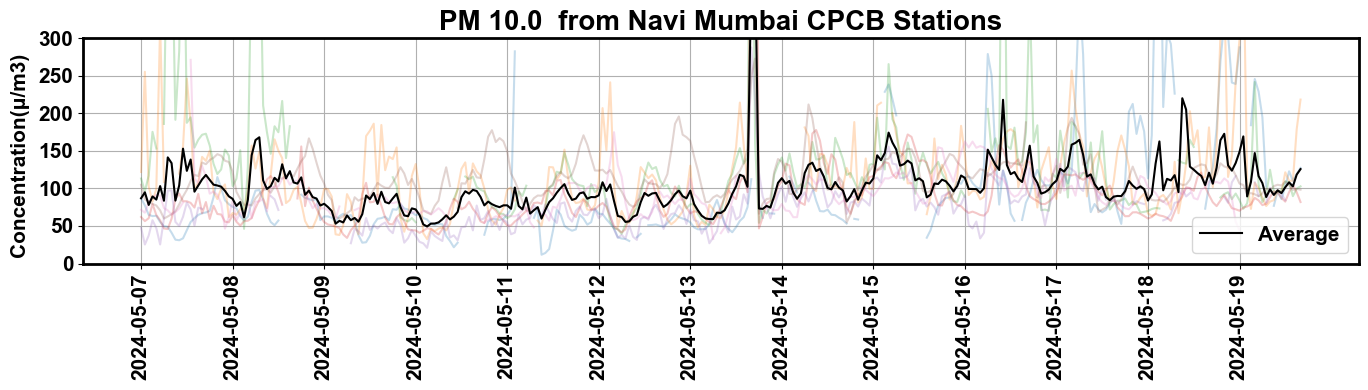

In [10]:
fig=plt.figure(figsize=(13.5,4))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)

font = font_manager.FontProperties(family='Arial',
                                   weight='bold',
                                   style='normal', size=15)
days=['2024-05-07','2024-05-08','2024-05-09','2024-05-10','2024-05-11','2024-05-12',
      '2024-05-13','2024-05-14','2024-05-15','2024-05-16','2024-05-17','2024-05-18',
      '2024-05-19']
con = [0,50,100,150,200,250,300,]#,200,250,300,350]
ax1 = plt.subplot()#1,3, 1)        

ax1.plot(data['From Date'],data['Kopripada-Vashi  Navi Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Mahape  Navi Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Nerul  Navi Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Sanpada  Navi Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Sector-19A Nerul  Navi Mumbai - IITM'],alpha=0.25)
ax1.plot(data['From Date'],data['Sector-2E Kalamboli  Navi Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Tondare-Taloja  Navi Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Colaba  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Ghatkopar  Mumbai - BMC'])
# ax1.plot(data['From Date'],data['Kandivali East  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
# ax1.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Kandivali West  Mumbai - BMC'],alpha=0.25)
# ax1.plot(data['From Date'],data['Kherwadi_Bandra East  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Khindipada-Bhandup West  Mumbai - IITM'],alpha=0.25)
# ax1.plot(data['From Date'],data['Kurla  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Mindspace-Malad West  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Mulund West  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Navy Nagar-Colaba  Mumbai - IITM'],alpha=0.25)
# ax1.plot(data['From Date'],data['Powai  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Siddharth Nagar-Worli  Mumbai - IITM'],alpha=0.25)
# ax1.plot(data['From Date'],data['Sewri  Mumbai - BMC'],alpha=0.25)
# ax1.plot(data['From Date'],data['Worli  Mumbai - MPCB'],alpha=0.25)
# ax1.plot(data['From Date'],data['Vile Parle West  Mumbai - MPCB'],alpha=0.25)
ax1.plot(data['From Date'],data['Mean'],c='black',label = 'Average')


ax1.set_ylim(0,300)
# ax1.set_xlim(0,40)
ax1.grid()
ax1.set_title('PM 10.0  from Navi Mumbai CPCB Stations',fontweight="bold", size=20,family= 'Arial')
ax1.set_xticks(days)
ax1.set_yticks(con)
plt.legend(prop={'family': 'Arial',"size":15,'weight':'bold'})
# ax1.legend(loc="upper left",prop=font, mode = "expand", ncol = 3)
# ax1.set_xticks(['2022-10-01','2022-10-10','2022-10-20','2022-10-24'])#,'2022-10-30'])
# ax1.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
ax1.tick_params(axis='x', labelsize=15)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
fig.text(-0.01, 0.6, 'Concentration(\u03BC/m3)', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
# fig.text(0.45, -0.025, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
#         fontname='Arial')
plt.tight_layout()
plt.savefig('PM_10_CPCB_Navi_Mumbai_Stations.jpg',bbox_inches='tight',dpi=720)

## AERONET Data 

In [47]:
data = pd.read_csv(r'H:\Mumbai_case\Aeronet Data\20240501_20240531_Pune.lev15',
                  sep=',',
                  header=0,
                  index_col=False,
                   skiprows = 6,
                   parse_dates=[['Date(dd:mm:yyyy)', 'Time(hh:mm:ss)']]
                  )
data

C:\Users\IITM\AppData\Local\Temp\ipykernel_16660\3245472525.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(r'H:\Mumbai_case\Aeronet Data\20240501_20240531_Pune.lev15',


Date(dd:mm:yyyy)_Time(hh:mm:ss)  Day_of_Year  Day_of_Year(Fraction)  \
0                01:05:2024 01:17:51          122             122.054063   
1                01:05:2024 01:20:37          122             122.055984   
2                01:05:2024 01:23:50          122             122.058218   
3                01:05:2024 01:27:27          122             122.060729   
4                01:05:2024 01:29:25          122             122.062095   
...                              ...          ...                    ...   
2485             31:05:2024 12:46:42          152             152.532431   
2486             31:05:2024 12:50:39          152             152.535174   
2487             31:05:2024 12:53:19          152             152.537025   
2488             31:05:2024 12:55:18          152             152.538403   
2489             31:05:2024 12:57:17          152             152.539780   

      AOD_1640nm  AOD_1020nm  AOD_870nm  AOD_865nm  AOD_779nm  AOD_675nm  \
0       0.114062    0.185756   0.224415     -999.0     -999.0   0.316931   
1       0.112277    0.183750   0.222525     -999.0     -999.0   0.315016   
2       0.113167    0.185391   0.224709     -999.0     -999.0   0.318664   
3       0.112487    0.184179   0.222882     -999.0     -999.0   0.315723   
4       0.111771    0.182795   0.221497     -999.0     -999.0   0.314054   
...          ...         ...        ...        ...        ...        ...   
2485    0.220094    0.271730   0.290272     -999.0     -999.0   0.331708   
2486    0.211080    0.260701   0.278454     -999.0     -999.0   0.317566   
2487    0.213803    0.264530   0.283222     -999.0     -999.0   0.324395   
2488    0.217606    0.269408   0.288283     -999.0     -999.0   0.330066   
2489    0.218797    0.270704   0.289616     -999.0     -999.0   0.331284   

      AOD_667nm  ...  Exact_Wavelengths_of_AOD(um)_380nm  \
0        -999.0  ...                            0.379515   
1        -999.0  ...                            0.379515   
2        -999.0  ...                            0.379515   
3        -999.0  ...                            0.379515   
4        -999.0  ...                            0.379515   
...         ...  ...                                 ...   
2485     -999.0  ...                            0.379515   
2486     -999.0  ...                            0.379515   
2487     -999.0  ...                            0.379515   
2488     -999.0  ...                            0.379515   
2489     -999.0  ...                            0.379515   

      Exact_Wavelengths_of_AOD(um)_340nm  Exact_Wavelengths_of_PW(um)_935nm  \
0                            -999.000000                            0.93748   
1                            -999.000000                            0.93748   
2                            -999.000000                            0.93748   
3                            -999.000000                            0.93748   
4                               0.339962                            0.93748   
...                                  ...                                ...   
2485                            0.339962                            0.93748   
2486                            0.339962                            0.93748   
2487                         -999.000000                            0.93748   
2488                         -999.000000                            0.93748   
2489                         -999.000000                            0.93748   

      Exact_Wavelengths_of_AOD(um)_681nm  Exact_Wavelengths_of_AOD(um)_709nm  \
0                                 -999.0                              -999.0   
1                                 -999.0                              -999.0   
2                                 -999.0                              -999.0   
3                                 -999.0                              -999.0   
4                                 -999.0                              -999.0   
...                          

In [48]:
data['Date(dd:mm:yyyy)_Time(hh:mm:ss)'] =  pd.to_datetime(data['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],format="%d:%m:%Y %H:%M:%S")
data

Date(dd:mm:yyyy)_Time(hh:mm:ss)  Day_of_Year  Day_of_Year(Fraction)  \
0                2024-05-01 01:17:51          122             122.054063   
1                2024-05-01 01:20:37          122             122.055984   
2                2024-05-01 01:23:50          122             122.058218   
3                2024-05-01 01:27:27          122             122.060729   
4                2024-05-01 01:29:25          122             122.062095   
...                              ...          ...                    ...   
2485             2024-05-31 12:46:42          152             152.532431   
2486             2024-05-31 12:50:39          152             152.535174   
2487             2024-05-31 12:53:19          152             152.537025   
2488             2024-05-31 12:55:18          152             152.538403   
2489             2024-05-31 12:57:17          152             152.539780   

      AOD_1640nm  AOD_1020nm  AOD_870nm  AOD_865nm  AOD_779nm  AOD_675nm  \
0       0.114062    0.185756   0.224415     -999.0     -999.0   0.316931   
1       0.112277    0.183750   0.222525     -999.0     -999.0   0.315016   
2       0.113167    0.185391   0.224709     -999.0     -999.0   0.318664   
3       0.112487    0.184179   0.222882     -999.0     -999.0   0.315723   
4       0.111771    0.182795   0.221497     -999.0     -999.0   0.314054   
...          ...         ...        ...        ...        ...        ...   
2485    0.220094    0.271730   0.290272     -999.0     -999.0   0.331708   
2486    0.211080    0.260701   0.278454     -999.0     -999.0   0.317566   
2487    0.213803    0.264530   0.283222     -999.0     -999.0   0.324395   
2488    0.217606    0.269408   0.288283     -999.0     -999.0   0.330066   
2489    0.218797    0.270704   0.289616     -999.0     -999.0   0.331284   

      AOD_667nm  ...  Exact_Wavelengths_of_AOD(um)_380nm  \
0        -999.0  ...                            0.379515   
1        -999.0  ...                            0.379515   
2        -999.0  ...                            0.379515   
3        -999.0  ...                            0.379515   
4        -999.0  ...                            0.379515   
...         ...  ...                                 ...   
2485     -999.0  ...                            0.379515   
2486     -999.0  ...                            0.379515   
2487     -999.0  ...                            0.379515   
2488     -999.0  ...                            0.379515   
2489     -999.0  ...                            0.379515   

      Exact_Wavelengths_of_AOD(um)_340nm  Exact_Wavelengths_of_PW(um)_935nm  \
0                            -999.000000                            0.93748   
1                            -999.000000                            0.93748   
2                            -999.000000                            0.93748   
3                            -999.000000                            0.93748   
4                               0.339962                            0.93748   
...                                  ...                                ...   
2485                            0.339962                            0.93748   
2486                            0.339962                            0.93748   
2487                         -999.000000                            0.93748   
2488                         -999.000000                            0.93748   
2489                         -999.000000                            0.93748   

      Exact_Wavelengths_of_AOD(um)_681nm  Exact_Wavelengths_of_AOD(um)_709nm  \
0                                 -999.0                              -999.0   
1                                 -999.0                              -999.0   
2                                 -999.0                              -999.0   
3                                 -999.0                              -999.0   
4                                 -999.0                              -999.0   
...                          

In [40]:
sorted(data.columns)

['340-440_Angstrom_Exponent',
 '380-500_Angstrom_Exponent',
 '440-675_Angstrom_Exponent',
 '440-675_Angstrom_Exponent[Polar]',
 '440-870_Angstrom_Exponent',
 '500-870_Angstrom_Exponent',
 'AERONET_Instrument_Number',
 'AERONET_Site_Name',
 'AOD_1020nm',
 'AOD_1640nm',
 'AOD_340nm',
 'AOD_380nm',
 'AOD_400nm',
 'AOD_412nm',
 'AOD_440nm',
 'AOD_443nm',
 'AOD_490nm',
 'AOD_500nm',
 'AOD_510nm',
 'AOD_531nm',
 'AOD_532nm',
 'AOD_551nm',
 'AOD_555nm',
 'AOD_560nm',
 'AOD_620nm',
 'AOD_667nm',
 'AOD_675nm',
 'AOD_681nm',
 'AOD_709nm',
 'AOD_779nm',
 'AOD_865nm',
 'AOD_870nm',
 'AOD_Empty',
 'AOD_Empty.1',
 'AOD_Empty.2',
 'AOD_Empty.3',
 'AOD_Empty.4',
 'Data_Quality_Level',
 'Date(dd:mm:yyyy)_Time(hh:mm:ss)',
 'Day_of_Year',
 'Day_of_Year(Fraction)',
 'Exact_Wavelengths_of_AOD(um)_1020nm',
 'Exact_Wavelengths_of_AOD(um)_1640nm',
 'Exact_Wavelengths_of_AOD(um)_340nm',
 'Exact_Wavelengths_of_AOD(um)_380nm',
 'Exact_Wavelengths_of_AOD(um)_400nm',
 'Exact_Wavelengths_of_AOD(um)_412nm',
 'Exact_

In [49]:
data = data.drop(['340-440_Angstrom_Exponent',
 '380-500_Angstrom_Exponent',
 '440-675_Angstrom_Exponent',
 '440-675_Angstrom_Exponent[Polar]',
 '440-870_Angstrom_Exponent',
 '500-870_Angstrom_Exponent',
 'AERONET_Instrument_Number',
 'AERONET_Site_Name',
  'AOD_Empty',
 'AOD_Empty.1',
 'AOD_Empty.2',
 'AOD_Empty.3',
 'AOD_Empty.4',
 'Data_Quality_Level',
 'Day_of_Year',
 'Day_of_Year(Fraction)',
 'Exact_Wavelengths_of_AOD(um)_1020nm',
 'Exact_Wavelengths_of_AOD(um)_1640nm',
 'Exact_Wavelengths_of_AOD(um)_340nm',
 'Exact_Wavelengths_of_AOD(um)_380nm',
 'Exact_Wavelengths_of_AOD(um)_400nm',
 'Exact_Wavelengths_of_AOD(um)_412nm',
 'Exact_Wavelengths_of_AOD(um)_440nm',
 'Exact_Wavelengths_of_AOD(um)_443nm',
 'Exact_Wavelengths_of_AOD(um)_490nm',
 'Exact_Wavelengths_of_AOD(um)_500nm',
 'Exact_Wavelengths_of_AOD(um)_510nm',
 'Exact_Wavelengths_of_AOD(um)_531nm',
 'Exact_Wavelengths_of_AOD(um)_532nm',
 'Exact_Wavelengths_of_AOD(um)_551nm',
 'Exact_Wavelengths_of_AOD(um)_555nm',
 'Exact_Wavelengths_of_AOD(um)_560nm',
 'Exact_Wavelengths_of_AOD(um)_620nm',
 'Exact_Wavelengths_of_AOD(um)_667nm',
 'Exact_Wavelengths_of_AOD(um)_675nm',
 'Exact_Wavelengths_of_AOD(um)_681nm',
 'Exact_Wavelengths_of_AOD(um)_709nm',
 'Exact_Wavelengths_of_AOD(um)_779nm',
 'Exact_Wavelengths_of_AOD(um)_865nm',
 'Exact_Wavelengths_of_AOD(um)_870nm',
 'Exact_Wavelengths_of_AOD(um)_Empty',
 'Exact_Wavelengths_of_AOD(um)_Empty.1',
 'Exact_Wavelengths_of_AOD(um)_Empty.2',
 'Exact_Wavelengths_of_AOD(um)_Empty.3',
 'Exact_Wavelengths_of_AOD(um)_Empty.4',
 'Exact_Wavelengths_of_PW(um)_935nm',
 'Last_Date_Processed',
 'NO2(Dobson)',
 'Number_of_Wavelengths',
 'Optical_Air_Mass',
 'Ozone(Dobson)',
 'Precipitable_Water(cm)',
 'Sensor_Temperature(Degrees_C)',
 'Site_Elevation(m)',
 'Site_Latitude(Degrees)',
 'Site_Longitude(Degrees)',
 'Solar_Zenith_Angle(Degrees)',
 'Triplet_Variability_1020',
 'Triplet_Variability_1640',
 'Triplet_Variability_340',
 'Triplet_Variability_380',
 'Triplet_Variability_400',
 'Triplet_Variability_412',
 'Triplet_Variability_440',
 'Triplet_Variability_443',
 'Triplet_Variability_490',
 'Triplet_Variability_500',
 'Triplet_Variability_510',
 'Triplet_Variability_531',
 'Triplet_Variability_532',
 'Triplet_Variability_551',
 'Triplet_Variability_555',
 'Triplet_Variability_560',
 'Triplet_Variability_620',
 'Triplet_Variability_667',
 'Triplet_Variability_675',
 'Triplet_Variability_681',
 'Triplet_Variability_709',
 'Triplet_Variability_779',
 'Triplet_Variability_865',
 'Triplet_Variability_870',
 'Triplet_Variability_AOD_Empty',
 'Triplet_Variability_AOD_Empty.1',
 'Triplet_Variability_AOD_Empty.2',
 'Triplet_Variability_AOD_Empty.3',
 'Triplet_Variability_AOD_Empty.4',
 'Triplet_Variability_Precipitable_Water(cm)'], axis=1)
data

Date(dd:mm:yyyy)_Time(hh:mm:ss)  AOD_1640nm  AOD_1020nm  AOD_870nm  \
0                2024-05-01 01:17:51    0.114062    0.185756   0.224415   
1                2024-05-01 01:20:37    0.112277    0.183750   0.222525   
2                2024-05-01 01:23:50    0.113167    0.185391   0.224709   
3                2024-05-01 01:27:27    0.112487    0.184179   0.222882   
4                2024-05-01 01:29:25    0.111771    0.182795   0.221497   
...                              ...         ...         ...        ...   
2485             2024-05-31 12:46:42    0.220094    0.271730   0.290272   
2486             2024-05-31 12:50:39    0.211080    0.260701   0.278454   
2487             2024-05-31 12:53:19    0.213803    0.264530   0.283222   
2488             2024-05-31 12:55:18    0.217606    0.269408   0.288283   
2489             2024-05-31 12:57:17    0.218797    0.270704   0.289616   

      AOD_865nm  AOD_779nm  AOD_675nm  AOD_667nm  AOD_620nm  AOD_560nm  ...  \
0        -999.0     -999.0   0.316931     -999.0     -999.0     -999.0  ...   
1        -999.0     -999.0   0.315016     -999.0     -999.0     -999.0  ...   
2        -999.0     -999.0   0.318664     -999.0     -999.0     -999.0  ...   
3        -999.0     -999.0   0.315723     -999.0     -999.0     -999.0  ...   
4        -999.0     -999.0   0.314054     -999.0     -999.0     -999.0  ...   
...         ...        ...        ...        ...        ...        ...  ...   
2485     -999.0     -999.0   0.331708     -999.0     -999.0     -999.0  ...   
2486     -999.0     -999.0   0.317566     -999.0     -999.0     -999.0  ...   
2487     -999.0     -999.0   0.324395     -999.0     -999.0     -999.0  ...   
2488     -999.0     -999.0   0.330066     -999.0     -999.0     -999.0  ...   
2489     -999.0     -999.0   0.331284     -999.0     -999.0     -999.0  ...   

      AOD_500nm  AOD_490nm  AOD_443nm  AOD_440nm  AOD_412nm  AOD_400nm  \
0      0.482978     -999.0     -999.0   0.565591     -999.0     -999.0   
1      0.480662     -999.0     -999.0   0.563488     -999.0     -999.0   
2      0.488005     -999.0     -999.0   0.572055     -999.0     -999.0   
3      0.482352     -999.0     -999.0   0.565617     -999.0     -999.0   
4      0.480539     -999.0     -999.0   0.563620     -999.0     -999.0   
...         ...        ...        ...        ...        ...        ...   
2485   0.416015     -999.0     -999.0   0.459539     -999.0     -999.0   
2486   0.397672     -999.0     -999.0   0.438987     -999.0     -999.0   
2487   0.409241     -999.0     -999.0   0.452768     -999.0     -999.0   
2488   0.416223     -999.0     -999.0   0.460720     -999.0     -999.0   
2489   0.416899     -999.0     -999.0   0.461199     -999.0     -999.0   

      AOD_380nm   AOD_340nm  AOD_681nm  AOD_709nm  
0      0.663573 -999.000000     -999.0     -999.0  
1      0.660520 -999.000000     -999.0     -999.0  
2      0.673478 -999.000000     -999.0     -999.0  
3      0.664867 -999.000000     -999.0     -999.0  
4      0.661528    0.726112     -999.0     -999.0  
...         ...         ...        ...        ...  
2485   0.522465    0.565300     -999.0     -999.0  
2486   0.500644    0.548229     -999.0     -999.0  
2487   0.519410 -999.000000     -999.0     -999.0  
2488   0.526856 -999.000000     -999.0     -999.0  
2489   0.526734 -999.000000     -999.0     -999.0  

[2490 rows x 25 columns]

In [51]:
pune_hourly = data.groupby(pd.Grouper(freq='H', key='Date(dd:mm:yyyy)_Time(hh:mm:ss)')).mean()

In [52]:
pune_hourly

AOD_1640nm  AOD_1020nm  AOD_870nm  AOD_865nm  \
Date(dd:mm:yyyy)_Time(hh:mm:ss)                                                 
2024-05-01 01:00:00                0.109413    0.177810   0.214950     -999.0   
2024-05-01 02:00:00                0.091050    0.144117   0.172953     -999.0   
2024-05-01 03:00:00                0.090929    0.142514   0.171795     -999.0   
2024-05-01 04:00:00                0.098345    0.151156   0.181735     -999.0   
2024-05-01 05:00:00                0.099485    0.145917   0.173096     -999.0   
...                                     ...         ...        ...        ...   
2024-05-31 08:00:00                0.205487    0.252161   0.271255     -999.0   
2024-05-31 09:00:00                0.207557    0.257861   0.279665     -999.0   
2024-05-31 10:00:00                0.219202    0.274039   0.297519     -999.0   
2024-05-31 11:00:00                0.233078    0.291314   0.315332     -999.0   
2024-05-31 12:00:00                0.220213    0.272981   0.292539     -999.0   

                                 AOD_779nm  AOD_675nm  AOD_667nm  AOD_620nm  \
Date(dd:mm:yyyy)_Time(hh:mm:ss)                                               
2024-05-01 01:00:00                 -999.0   0.303889     -999.0     -999.0   
2024-05-01 02:00:00                 -999.0   0.240887     -999.0     -999.0   
2024-05-01 03:00:00                 -999.0   0.238260     -999.0     -999.0   
2024-05-01 04:00:00                 -999.0   0.248010     -999.0     -999.0   
2024-05-01 05:00:00                 -999.0   0.228192     -999.0     -999.0   
...                                    ...        ...        ...        ...   
2024-05-31 08:00:00                 -999.0   0.305352     -999.0     -999.0   
2024-05-31 09:00:00                 -999.0   0.321556     -999.0     -999.0   
2024-05-31 10:00:00                 -999.0   0.347859     -999.0     -999.0   
2024-05-31 11:00:00                 -999.0   0.369651     -999.0     -999.0   
2024-05-31 12:00:00                 -999.0   0.336322     -999.0     -999.0   

                                 AOD_560nm  AOD_555nm  ...  AOD_500nm  \
Date(dd:mm:yyyy)_Time(hh:mm:ss)                        ...              
2024-05-01 01:00:00                 -999.0     -999.0  ...   0.464633   
2024-05-01 02:00:00                 -999.0     -999.0  ...   0.367560   
2024-05-01 03:00:00                 -999.0     -999.0  ...   0.364334   
2024-05-01 04:00:00                 -999.0     -999.0  ...   0.375723   
2024-05-01 05:00:00                 -999.0     -999.0  ...   0.339290   
...                                    ...        ...  ...        ...   
2024-05-31 08:00:00                 -999.0     -999.0  ...   0.378914   
2024-05-31 09:00:00                 -999.0     -999.0  ...   0.409716   
2024-05-31 10:00:00                 -999.0     -999.0  ...   0.452671   
2024-05-31 11:00:00                 -999.0     -999.0  ...   0.479527   
2024-05-31 12:00:00                 -999.0     -999.0  ...   0.425481   

                                 AOD_490nm  AOD_443nm  AOD_440nm  AOD_412nm  \
Date(dd:mm:yyyy)_Time(hh:mm:ss)                                               
2024-05-01 01:00:00                 -999.0     -999.0   0.544810     -999.0   
2024-05-01 02:00:00                 -999.0     -999.0   0.430717     -999.0   
2024-05-01 03:00:00                 -999.0     -999.0   0.427113     -999.0   
2024-05-01 04:00:00                 -999.0     -999.0   0.439486     -999.0   
2024-05-01 05:00:00                 -999.0     -999.0   0.394044     -999.0   
...                                    ...        ...        ...        ...   
2024-05-31 08:00:00                 -999.0     -999.0   0.414526     -999.0   
2024-05-31 09:00:00                 -999.0     -999.0   0.454371     -999.0   
2024-05-31 10:00:00                 -999.0     -999.0   0.506612     -999.0   
2024-05-31 11:00:00                 -999.0     -999.0   0.535865     -999.0   
2024-05-31 12:00:00                 -999.0     -999.0

In [61]:
pune_hourly_i = pune_hourly.reset_index()

In [73]:
pune_hourly_i

Date(dd:mm:yyyy)_Time(hh:mm:ss)  AOD_1640nm  AOD_1020nm  AOD_870nm  \
0               2024-05-01 01:00:00    0.109413    0.177810   0.214950   
1               2024-05-01 02:00:00    0.091050    0.144117   0.172953   
2               2024-05-01 03:00:00    0.090929    0.142514   0.171795   
3               2024-05-01 04:00:00    0.098345    0.151156   0.181735   
4               2024-05-01 05:00:00    0.099485    0.145917   0.173096   
..                              ...         ...         ...        ...   
727             2024-05-31 08:00:00    0.205487    0.252161   0.271255   
728             2024-05-31 09:00:00    0.207557    0.257861   0.279665   
729             2024-05-31 10:00:00    0.219202    0.274039   0.297519   
730             2024-05-31 11:00:00    0.233078    0.291314   0.315332   
731             2024-05-31 12:00:00    0.220213    0.272981   0.292539   

     AOD_865nm  AOD_779nm  AOD_675nm  AOD_667nm  AOD_620nm  AOD_560nm  ...  \
0       -999.0     -999.0   0.303889     -999.0     -999.0     -999.0  ...   
1       -999.0     -999.0   0.240887     -999.0     -999.0     -999.0  ...   
2       -999.0     -999.0   0.238260     -999.0     -999.0     -999.0  ...   
3       -999.0     -999.0   0.248010     -999.0     -999.0     -999.0  ...   
4       -999.0     -999.0   0.228192     -999.0     -999.0     -999.0  ...   
..         ...        ...        ...        ...        ...        ...  ...   
727     -999.0     -999.0   0.305352     -999.0     -999.0     -999.0  ...   
728     -999.0     -999.0   0.321556     -999.0     -999.0     -999.0  ...   
729     -999.0     -999.0   0.347859     -999.0     -999.0     -999.0  ...   
730     -999.0     -999.0   0.369651     -999.0     -999.0     -999.0  ...   
731     -999.0     -999.0   0.336322     -999.0     -999.0     -999.0  ...   

     AOD_500nm  AOD_490nm  AOD_443nm  AOD_440nm  AOD_412nm  AOD_400nm  \
0     0.464633     -999.0     -999.0   0.544810     -999.0     -999.0   
1     0.367560     -999.0     -999.0   0.430717     -999.0     -999.0   
2     0.364334     -999.0     -999.0   0.427113     -999.0     -999.0   
3     0.375723     -999.0     -999.0   0.439486     -999.0     -999.0   
4     0.339290     -999.0     -999.0   0.394044     -999.0     -999.0   
..         ...        ...        ...        ...        ...        ...   
727   0.378914     -999.0     -999.0   0.414526     -999.0     -999.0   
728   0.409716     -999.0     -999.0   0.454371     -999.0     -999.0   
729   0.452671     -999.0     -999.0   0.506612     -999.0     -999.0   
730   0.479527     -999.0     -999.0   0.535865     -999.0     -999.0   
731   0.425481     -999.0     -999.0   0.471434     -999.0     -999.0   

     AOD_380nm   AOD_340nm  AOD_681nm  AOD_709nm  
0     0.640948 -306.905826     -999.0     -999.0  
1     0.511036    0.559333     -999.0     -999.0  
2     0.508873    0.554679     -999.0     -999.0  
3     0.524334    0.571550     -999.0     -999.0  
4     0.472539    0.513713     -999.0     -999.0  
..         ...         ...        ...        ...  
727   0.471128    0.501816     -999.0     -999.0  
728   0.521175    0.561464     -999.0     -999.0  
729   0.585056    0.634750     -999.0     -999.0  
730   0.613233    0.663974     -999.0     -999.0  
731   0.537773 -213.610020     -999.0     -999.0  

[732 rows x 25 columns]

In [64]:
# data['AOD_1640nm'] = data['AOD_1640nm'].replace(-999.000000,np.nan)#AOD_551nm
# data['AOD_1020nm'] = data['AOD_1020nm'].replace(-999.000000,np.nan)
# data['AOD_870nm'] = data['AOD_870nm'].replace(-999.000000,np.nan)
# data['AOD_675nm'] = data['AOD_675nm'].replace(-999.000000,np.nan)
# data['AOD_709nm'] = data['AOD_709nm'].replace(-999.000000,np.nan)



pune_hourly_i['AOD_1640nm'] = pune_hourly_i['AOD_1640nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_1020nm'] = pune_hourly_i['AOD_1020nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_870nm']  = pune_hourly_i['AOD_870nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_675nm']  = pune_hourly_i['AOD_675nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_500nm']  = pune_hourly_i['AOD_500nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_510nm']  = pune_hourly_i['AOD_510nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_440nm']  = pune_hourly_i['AOD_440nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_380nm']  = pune_hourly_i['AOD_380nm'].replace(-999.000000,np.nan)
pune_hourly_i['AOD_340nm']  = pune_hourly_i['AOD_340nm'].replace(-999.000000,np.nan)

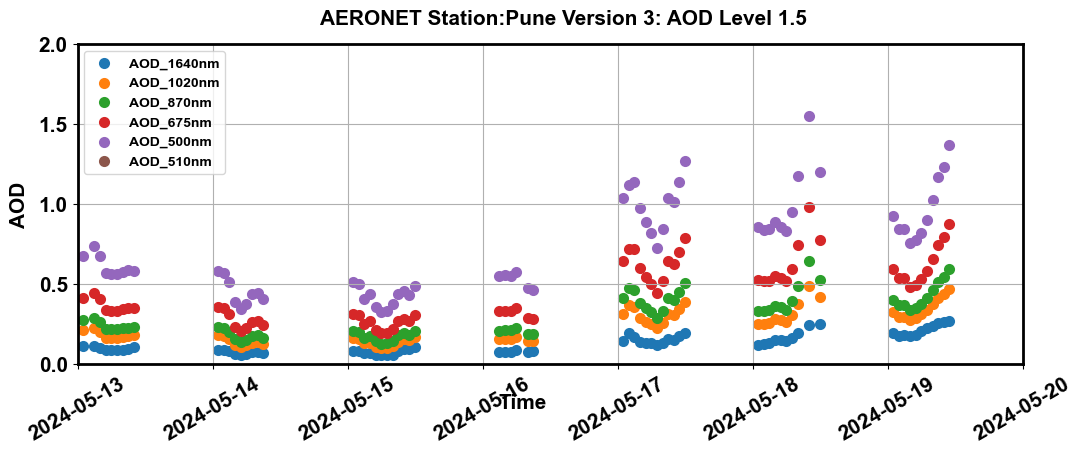

In [93]:
import datetime

fig=plt.figure(figsize=(13.5,4))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.2, hspace=0.02)

ax1 = plt.subplot(1,1, 1)        
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_1640nm'],label='AOD_1640nm',lw=2)
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_1020nm'],label='AOD_1020nm',lw=2)
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_870nm'],label='AOD_870nm',lw=2)
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_675nm'],label='AOD_675nm',lw=2)
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_500nm'],label='AOD_500nm',lw=2)
ax1.scatter(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_510nm'],label='AOD_510nm',lw=2)
# ax1.plot(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_440nm'],label='AOD_440nm',lw=2)
# ax1.plot(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_380nm'],label='AOD_380nm',lw=2)
# ax1.plot(pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)'],pune_hourly_i['AOD_340nm'],label='AOD_340nm',lw=2)

ax1.set_ylim(0,2)
ax1.set_xlim([datetime.date(2024, 5, 13), datetime.date(2024, 5, 20)]) # import date time
ax1.legend(loc=1)
ax1.grid(True)
plt.legend(prop={'family': 'Arial',"size":10,'weight':'bold'})
# ax1.set_xticks([-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30])
# ax1.set_yticks([0,2,4,6,8,10,12,14,16])
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(15)
    tick.label1.set_fontweight('bold')
    tick.label1.set_rotation(30)
ax1.tick_params(axis='x', labelsize=15)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=15) 
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
    
fig.text(0.05, 0.5, 'AOD', va='center', rotation='vertical',fontsize=15,fontweight='bold',style='normal',        
         fontname='Arial')
fig.text(0.43, -0.01, 'Time', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')
fig.text(0.46, 0.95, 'AERONET Station:Pune Version 3: AOD Level 1.5', ha='center',fontsize=15,fontweight='bold',style='normal',
        fontname='Arial')
plt.savefig(r'H:\Mumbai_case\Aeronet Data\AERONET_Pune_lim.jpg',bbox_inches='tight',dpi=1080)

## Now drop rows with nan values

In [75]:
pune_hourly_n = pune_hourly_i.dropna()
pune_hourly_n



pune_hourly_i['AOD_1640nm'] = pune_hourly_i['AOD_1640nm'].dropna()
pune_hourly_i['AOD_1020nm'] = pune_hourly_i['AOD_1020nm'].dropna()
pune_hourly_i['AOD_870nm']  = pune_hourly_i['AOD_870nm'].dropna()
pune_hourly_i['AOD_675nm']  = pune_hourly_i['AOD_675nm'].dropna()
pune_hourly_i['AOD_500nm']  = pune_hourly_i['AOD_500nm'].dropna()
pune_hourly_i['AOD_510nm']  = pune_hourly_i['AOD_510nm'].dropna()
pune_hourly_i['AOD_440nm']  = pune_hourly_i['AOD_440nm'].dropna()
pune_hourly_i['AOD_380nm']  = pune_hourly_i['AOD_380nm'].dropna()
pune_hourly_i['AOD_340nm']  = pune_hourly_i['AOD_340nm'].dropna()

In [83]:
pune_hourly_i['Date(dd:mm:yyyy)_Time(hh:mm:ss)']

0     2024-05-01 01:00:00
1     2024-05-01 02:00:00
2     2024-05-01 03:00:00
3     2024-05-01 04:00:00
4     2024-05-01 05:00:00
              ...        
727   2024-05-31 08:00:00
728   2024-05-31 09:00:00
729   2024-05-31 10:00:00
730   2024-05-31 11:00:00
731   2024-05-31 12:00:00
Name: Date(dd:mm:yyyy)_Time(hh:mm:ss), Length: 732, dtype: datetime64[ns]